In [1]:
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [2]:
df=pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
pd.DataFrame(df.select_dtypes(np.number).columns)

,0
0,age
1,duration
2,campaign
3,pdays
4,previous
5,emp.var.rate
6,cons.price.idx
7,cons.conf.idx
8,euribor3m
9,nr.employed


In [6]:
pd.DataFrame(df.select_dtypes(object).columns)

,0
0,job
1,marital
2,education
3,default
4,housing
5,loan
6,contact
7,month
8,day_of_week
9,poutcome


In [7]:
pd.DataFrame(df.isnull().sum())

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


# outliers

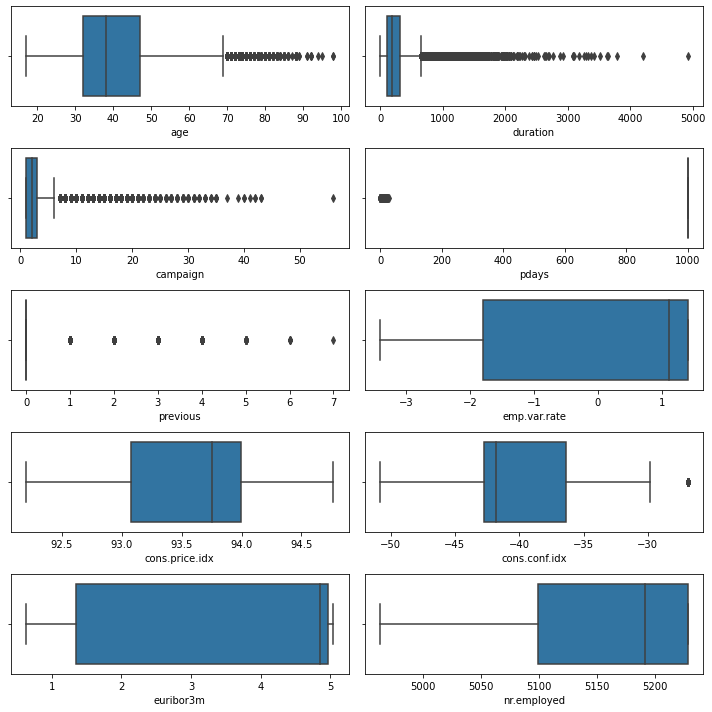

In [8]:
c=1
plt.figure(figsize=(10,10))
for i in df.select_dtypes(np.number).columns:
    plt.subplot(5,2,c)
    sns.boxplot(df[i])
    plt.tight_layout()
    c+=1

In [9]:
# the outlier in the variable are seems to be pattern not to be noise 

# correlation

<AxesSubplot:>

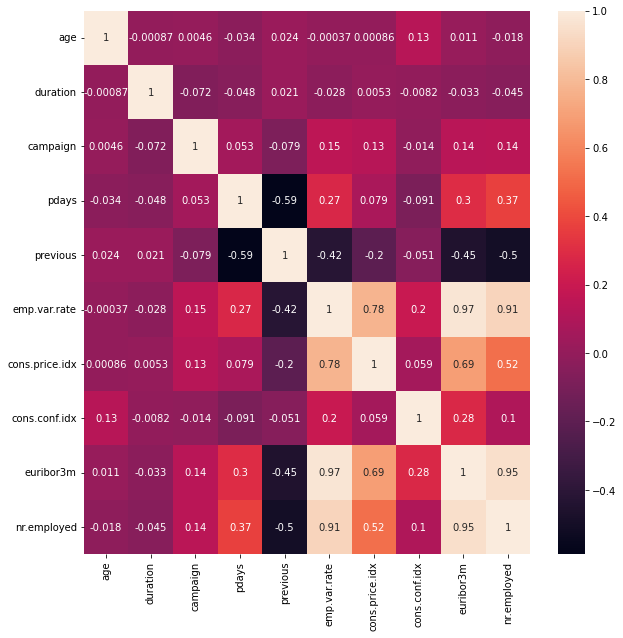

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# Univariant

<AxesSubplot:xlabel='y', ylabel='count'>

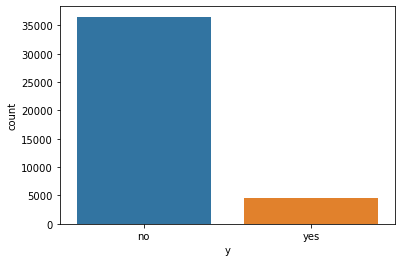

In [11]:
sns.countplot(df["y"])

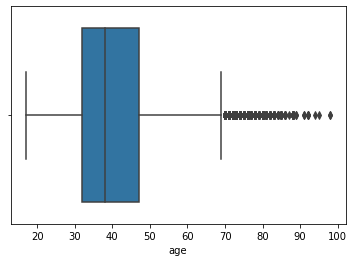

In [12]:
#univariate analysis 
sns.boxplot(df['age'])
plt.show()

In [13]:
df.age.describe()

count   41188.000000
mean       40.024060
std        10.421250
min        17.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        98.000000
Name: age, dtype: float64

Inference:

1. Mean and median are nearly equal 

2. The majority population comes under the range of 32  to 47

3. The outliers after 70 are considered as outliers

4. The maximum value of outlier is 98

    


In [14]:
df.job.describe()

count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object

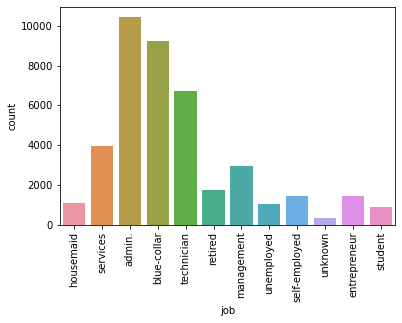

In [15]:
sns.countplot(df.job)
plt.xticks(rotation=90)
plt.show()

Inference:

1. The majority of the people are working as Admin followed by blue collar and technician 

2. We have unknown percentage of 0.8%


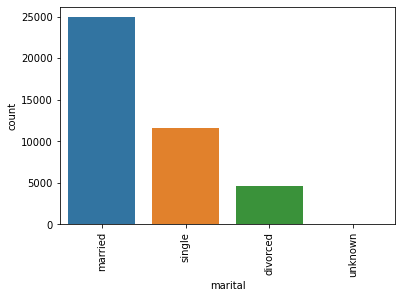

In [16]:
sns.countplot(df.marital)
plt.xticks(rotation=90)
plt.show()

## Inference:

1. The majority of the people are married followed by single and divorced 

2. We have unknown percentage of 0.19%


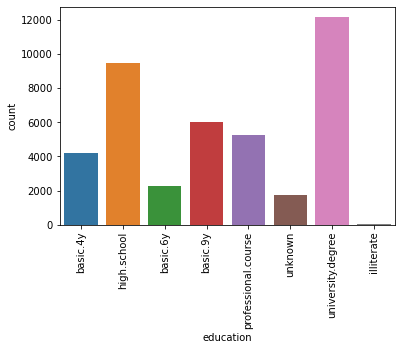

In [17]:
sns.countplot(df.education)
plt.xticks(rotation=90)
plt.show()

## Inference:

1. The majority of the people are university degree holders followed by high school and bascic.9.y

2. We have unknown percentage of 4.2%

3. We have very small amount of illiterates.


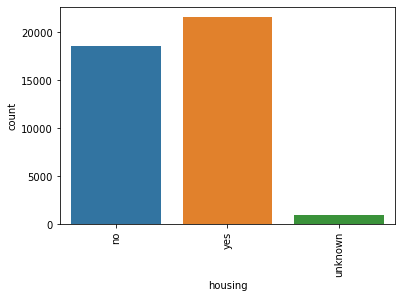

In [18]:
sns.countplot(df.housing)
plt.xticks(rotation=90)
plt.show()

## Inference:

1. The majority of the people has history of housing loan. 

2. We have unknown percentage of 2.40%

3. The values are balanced in this variable.


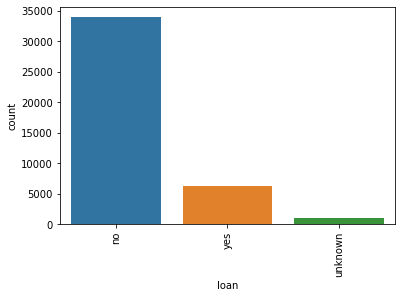

In [19]:
sns.countplot(df.loan)
plt.xticks(rotation=90)
plt.show()

## Inference:

1. The majority of the people dont have active loan. 

2. We have unknown percentage of 2.40%



## Variable - Contact

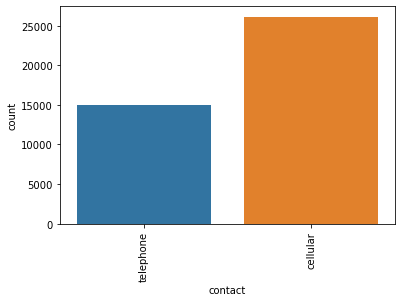

In [20]:
sns.countplot(df.contact)
plt.xticks(rotation=90)
plt.show()

## Inference:

1. The communication is basically made using two modes - telephone and cellular.

2. The majority of communication is made using cellular.

## Variable - Month

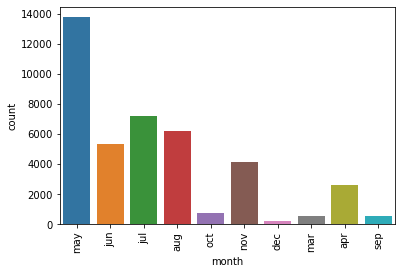

In [21]:
sns.countplot(df.month)
plt.xticks(rotation=90)
plt.show()

## Inference:

1. In the range of may 2008 to November 2010, most of the calls had been made in may month.

2. Considering domain, may month will be the first month to start the financial year as the financial year closes by april.

3. It is inferred that in the month of december, least number of

## Variable - Day of the week 

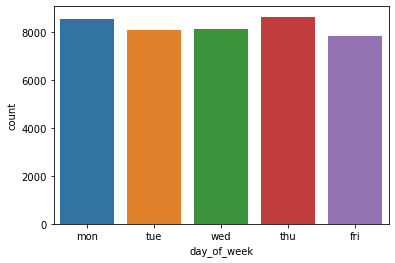

In [22]:
sns.countplot(df.day_of_week)
plt.show()

## Inference:

1. Majority of the calls are made on thursday when compared to other days.

2. Considering other days, number of calls are nearly equal on other days  

## Variable - Campaign

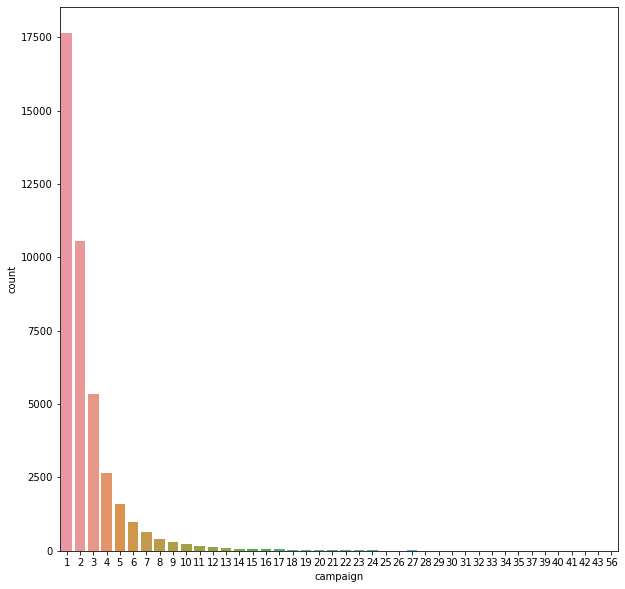

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(df.campaign)
plt.show()

## Inference:

1. The values in X axis shows the count of contacts made during this campaign
2. Majority of the people were contacted only once during this campaign

## Variable - Pdays  

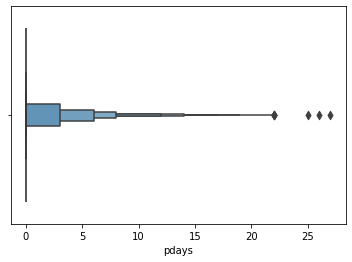

In [24]:
#replacing 999 - which is the client not contacted previously is replaced with 0

df["pdays"].replace(999,0,inplace=True)
sns.boxenplot(df["pdays"])
plt.show()

## Inference:

1. Majority of the people were not contacted previously.

2. Only very few people were contacted previously.

## Variable - Previous

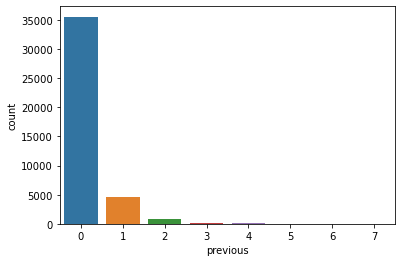

In [25]:
sns.countplot(df.previous)
plt.show()

## Inference:

1. The values in X-axis shows the number of times clients were contacted before this campaign

2. It is inferred that, most of the clients were not contacted before this campaign 


## Variable - Poutcome

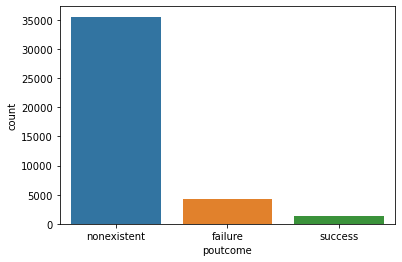

In [26]:
sns.countplot(df.poutcome)
plt.show()

## Inference:

1. The values in X-axis represents the result of the previous marketing campaign

2. As inferred from the "previous" variable analysis, most of the clients were not contacted before and there would be no posibility that those clients will be present in the previous campaign.



## Variable - Emp.Var.Rate

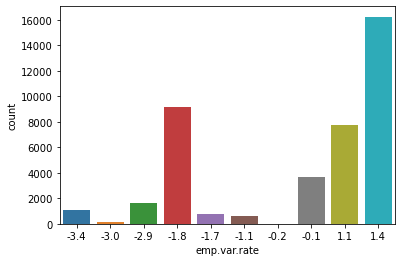

In [27]:
sns.countplot(df['emp.var.rate'])
plt.show()

## Inference:



## Variable - cons.price.idx

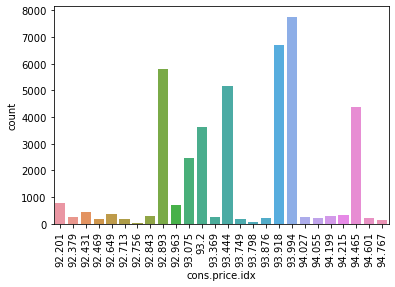

In [28]:
sns.countplot(df['cons.price.idx'])
plt.xticks(rotation=90)
plt.show()

In [29]:
df_cat = df.select_dtypes(include = 'object')
df_nu = df.select_dtypes(exclude = 'object')

<AxesSubplot:ylabel='job'>

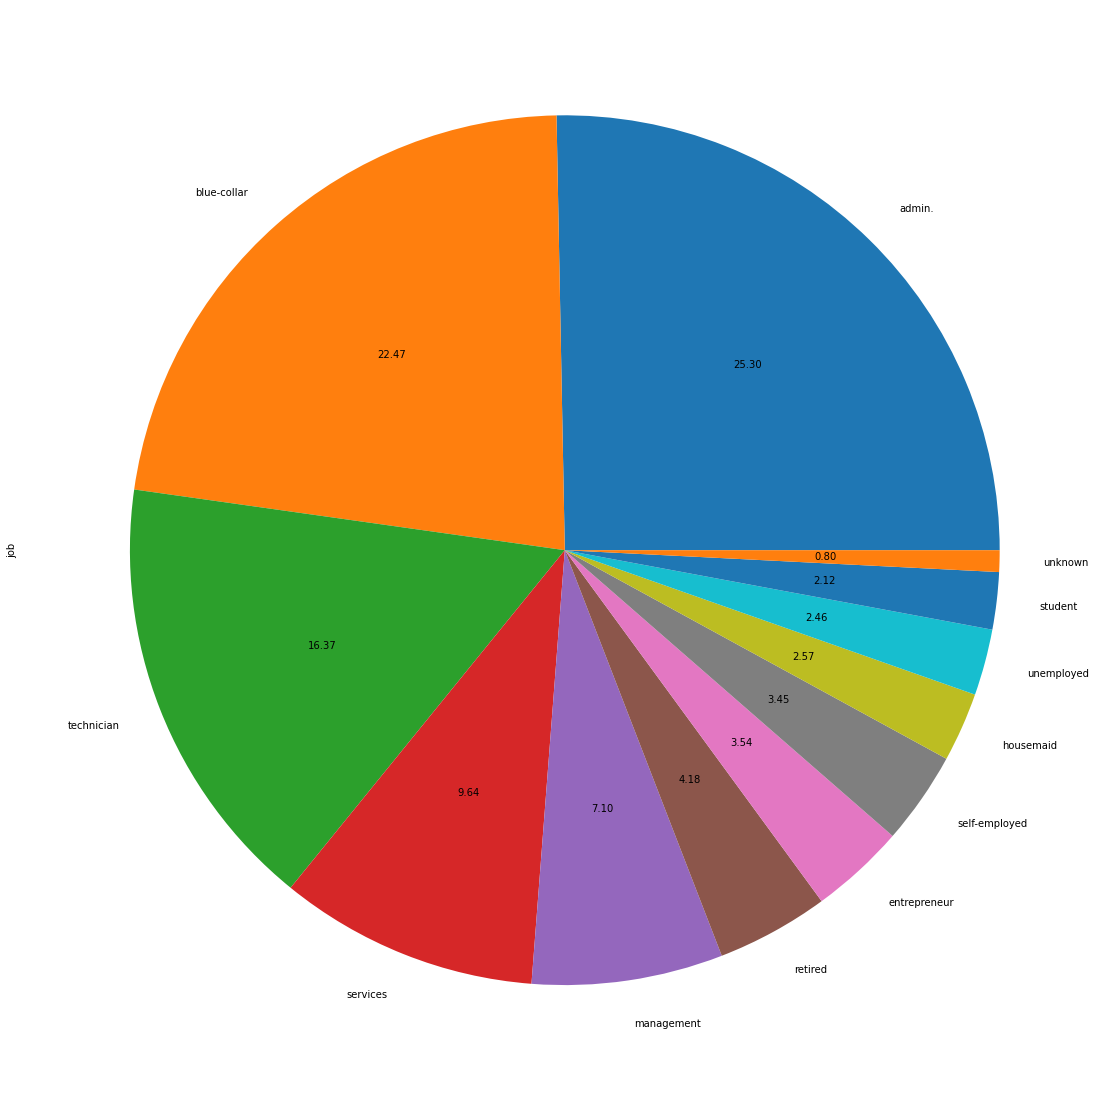

In [30]:
plt.figure(figsize=(20,20))
df_cat.job.value_counts().plot(kind = 'pie', autopct= "%.2f" )


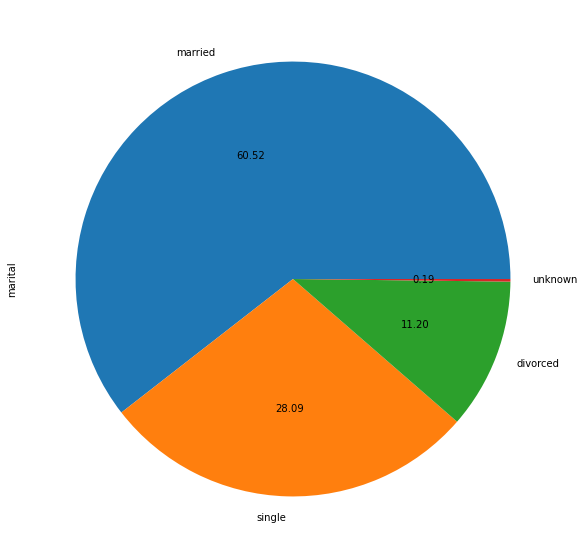

In [31]:
plt.figure(figsize=(10,10))

df_cat.marital.value_counts().plot(kind = 'pie',autopct= "%.2f" );

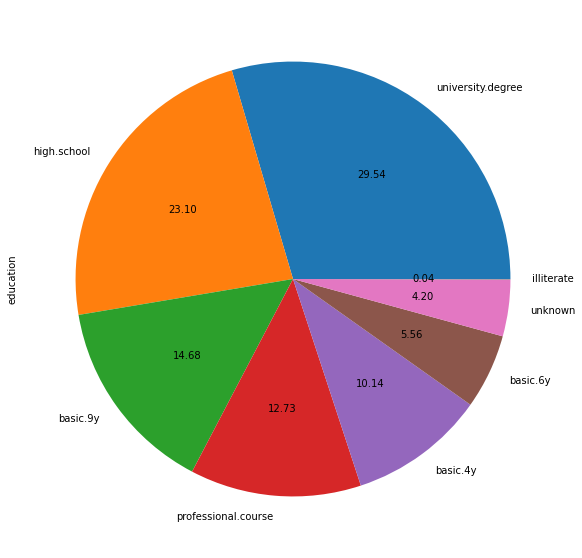

In [32]:
plt.figure(figsize=(10,10))

df_cat.education.value_counts().plot(kind = 'pie',autopct= "%.2f");

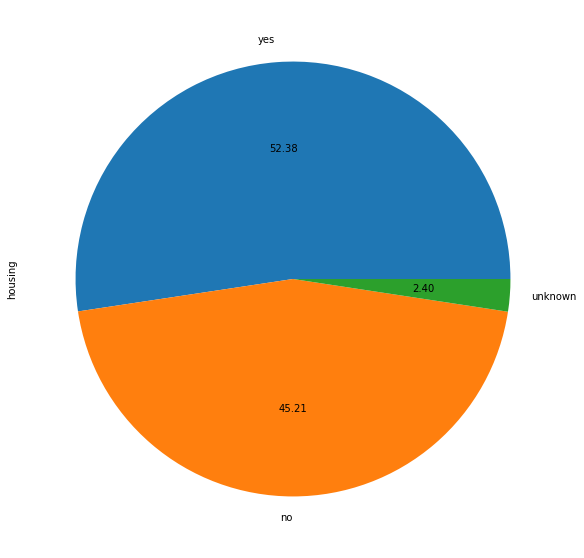

In [33]:
plt.figure(figsize=(10,10))

df_cat.housing.value_counts().plot(kind = 'pie',autopct= "%.2f");

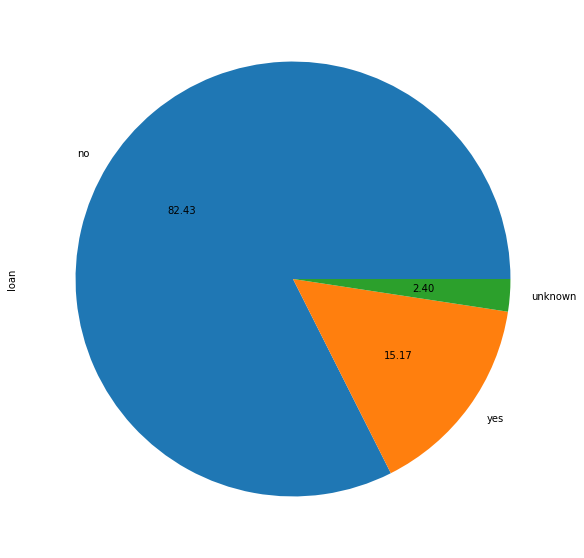

In [34]:
plt.figure(figsize=(10,10))

df_cat.loan.value_counts().plot(kind = 'pie',autopct= "%.2f");

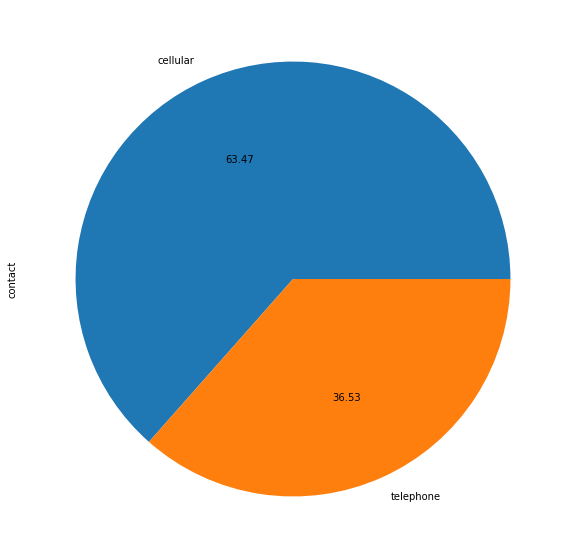

In [35]:
plt.figure(figsize=(10,10))

df_cat.contact.value_counts().plot(kind = 'pie',autopct= "%.2f");

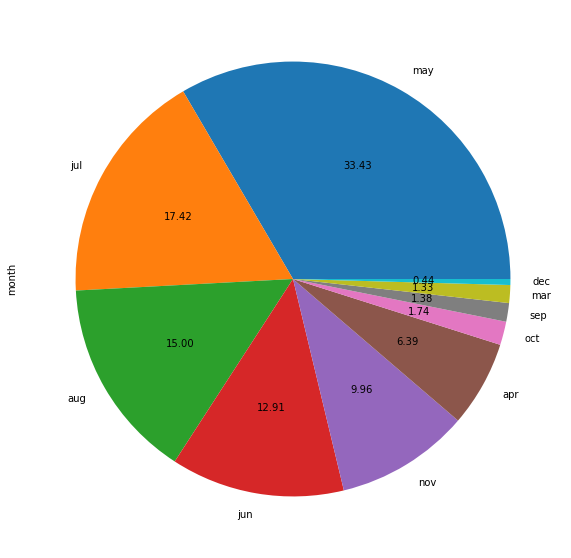

In [36]:
plt.figure(figsize=(10,10))

df_cat.month.value_counts().plot(kind = 'pie',autopct= "%.2f");

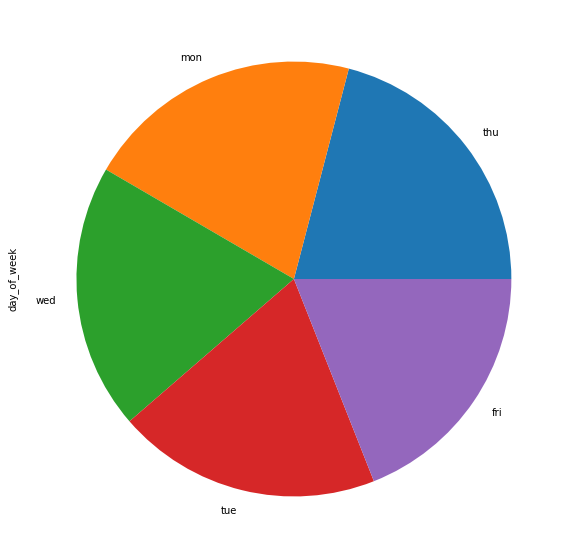

In [37]:
plt.figure(figsize=(10,10))

df_cat.day_of_week.value_counts().plot(kind = 'pie');

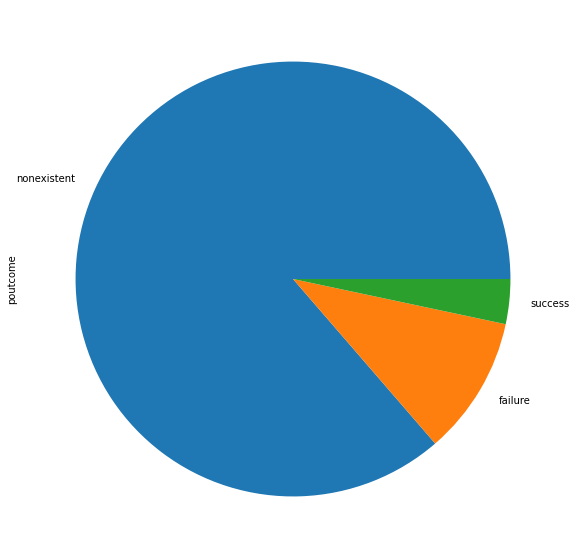

In [38]:
plt.figure(figsize=(10,10))

df_cat.poutcome.value_counts().plot(kind = 'pie');

## Bivariate analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

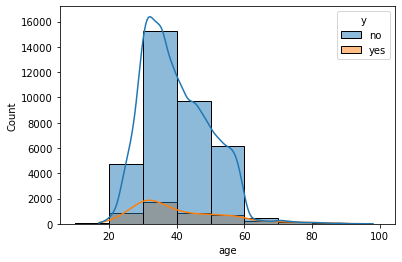

In [39]:
sns.histplot(data=df,x="age",hue="y",kde=True,bins=[10,20,30,40,50,60,70,80,90,100])

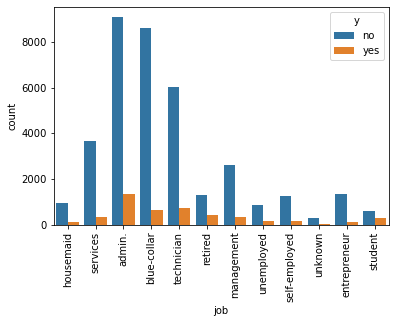

In [40]:
sns.countplot(df['job'],hue=df['y'])
plt.xticks(rotation=90)
plt.show()

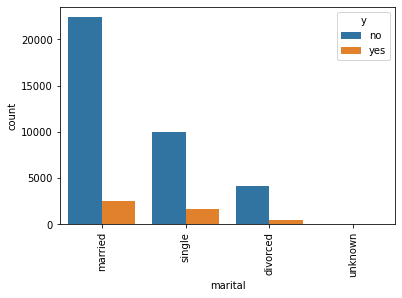

In [41]:
sns.countplot(df['marital'],hue=df['y'])
plt.xticks(rotation=90)
plt.show()

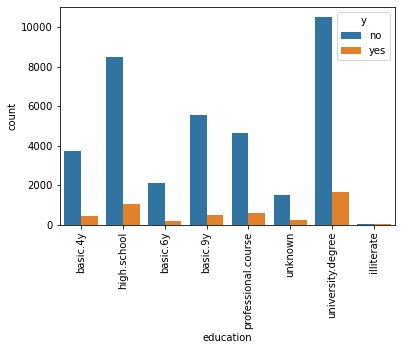

In [42]:
sns.countplot(df['education'],hue=df['y'])
plt.xticks(rotation=90)
plt.show()

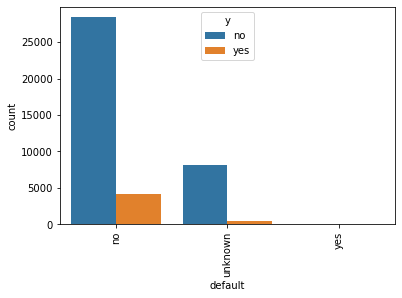

In [43]:
sns.countplot(df['default'],hue=df['y'])
plt.xticks(rotation=90)
plt.show()

In [44]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

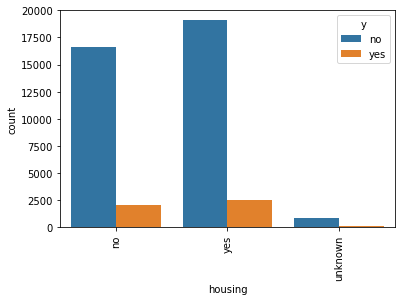

In [45]:
sns.countplot(df['housing'],hue=df['y'])
plt.xticks(rotation=90)
plt.show()

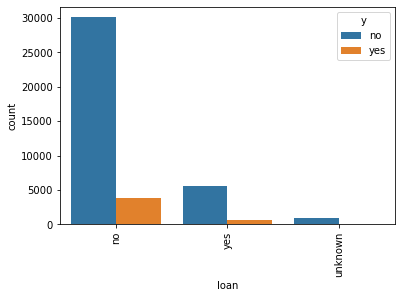

In [46]:
sns.countplot(df['loan'],hue=df['y'])
plt.xticks(rotation=90)
plt.show()

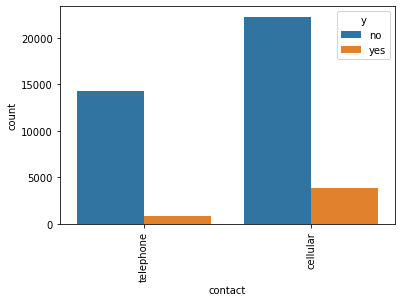

In [47]:
sns.countplot(df['contact'],hue=df['y'])
plt.xticks(rotation=90)
plt.show()

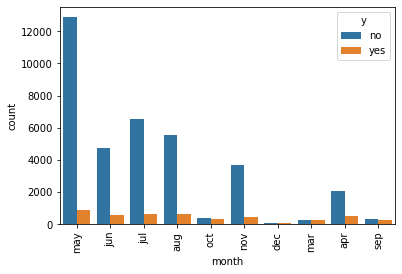

In [48]:
sns.countplot(df['month'],hue=df['y'])
plt.xticks(rotation=90)
plt.show()

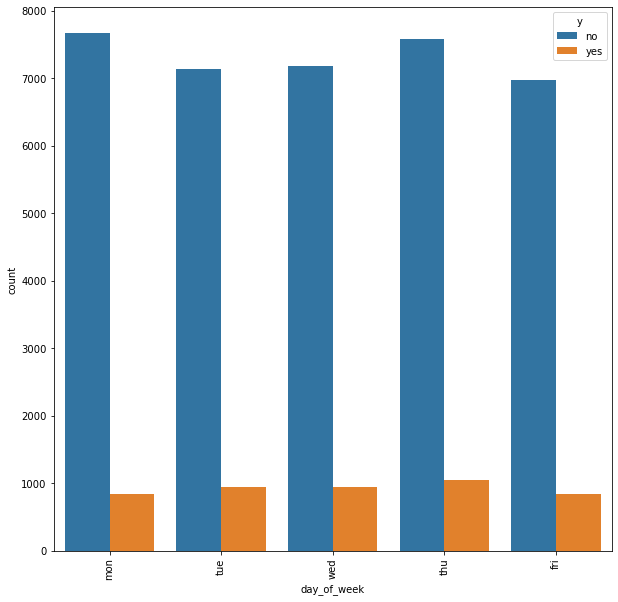

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(df['day_of_week'],hue=df['y'])
plt.xticks(rotation=90)
plt.show()

In [50]:
df.duration.describe()

count   41188.000000
mean      258.285010
std       259.279249
min         0.000000
25%       102.000000
50%       180.000000
75%       319.000000
max      4918.000000
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='Count'>

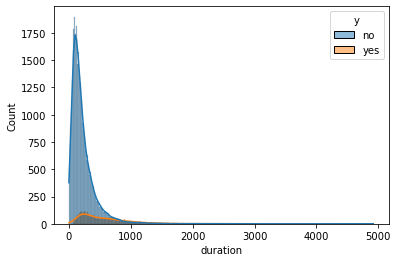

In [51]:

sns.histplot(data=df,x="duration",hue="y",kde=True)

<AxesSubplot:xlabel='campaign', ylabel='Count'>

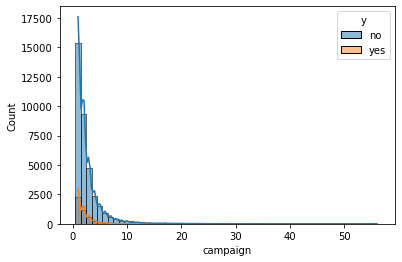

In [52]:
sns.histplot(data=df,x="campaign",hue="y",kde=True,discrete=True)

<AxesSubplot:xlabel='pdays', ylabel='Count'>

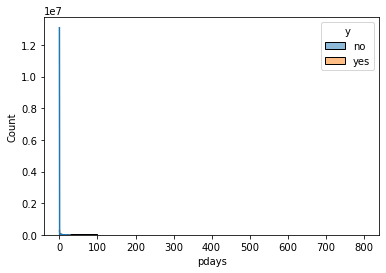

In [53]:
sns.histplot(data=df,x="pdays",hue="y",kde=True,bins=[0,100,200,300,400,500,600,700,800])

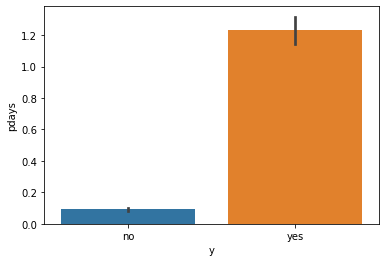

In [54]:
sns.barplot(df['y'],df['pdays'])
plt.show()

<AxesSubplot:xlabel='previous', ylabel='Count'>

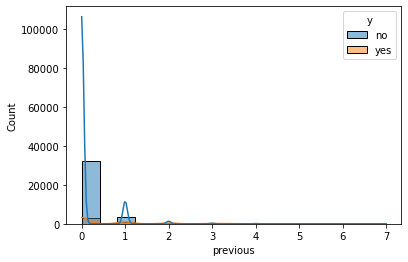

In [55]:
sns.histplot(data=df,x="previous",hue="y",kde=True)

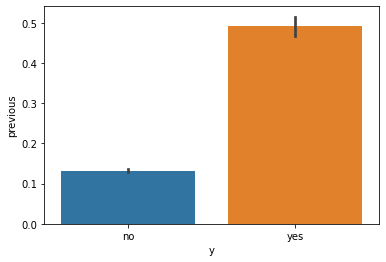

In [56]:
sns.barplot(df['y'],df['previous'])
plt.show()

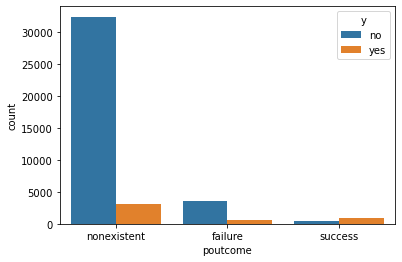

In [57]:
sns.countplot(df['poutcome'],hue=df['y'])
plt.show()

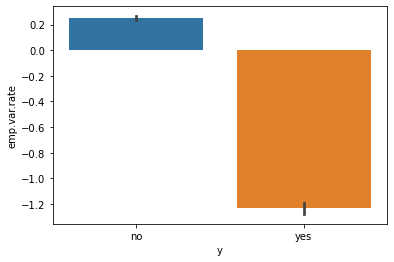

In [58]:
sns.barplot(df['y'],df['emp.var.rate'])
plt.show()

<AxesSubplot:xlabel='cons.price.idx', ylabel='Count'>

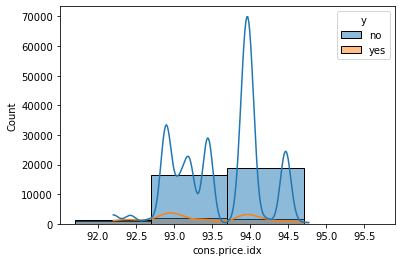

In [59]:
sns.histplot(data=df,x="cons.price.idx",hue="y",kde=True,discrete=True)

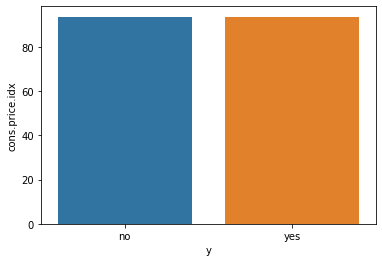

In [60]:
sns.barplot(df['y'],df['cons.price.idx'])
plt.show()

<AxesSubplot:xlabel='cons.conf.idx', ylabel='Count'>

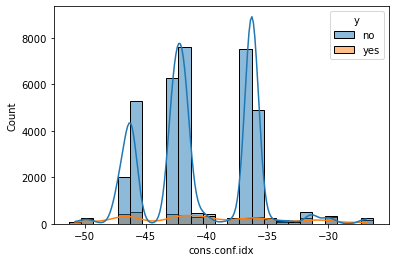

In [61]:
sns.histplot(data=df,x="cons.conf.idx",hue="y",kde=True,discrete=True)

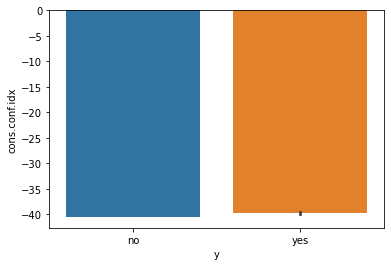

In [62]:
sns.barplot(df['y'],df['cons.conf.idx'])
plt.show()

<AxesSubplot:xlabel='euribor3m', ylabel='Count'>

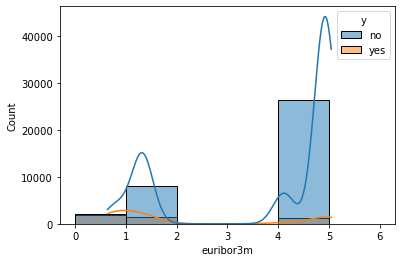

In [63]:
sns.histplot(data=df,x="euribor3m",hue="y",kde=True,bins=[0,1,2,3,4,5,6])

In [64]:
df['euribor3m'].describe()

count   41188.000000
mean        3.621291
std         1.734447
min         0.634000
25%         1.344000
50%         4.857000
75%         4.961000
max         5.045000
Name: euribor3m, dtype: float64

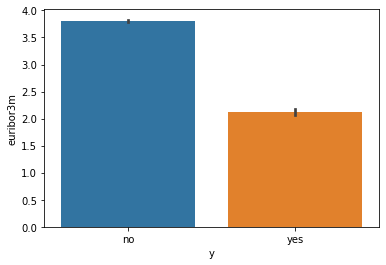

In [65]:
sns.barplot(df['y'],df['euribor3m'])
plt.show()

In [66]:
df['nr.employed'].describe()

count   41188.000000
mean     5167.035911
std        72.251528
min      4963.600000
25%      5099.100000
50%      5191.000000
75%      5228.100000
max      5228.100000
Name: nr.employed, dtype: float64

In [67]:
pday=df[["pdays","y"]]
pday["new_cilent"]="999"
pday.head()

,pdays,y,new_cilent
0,0,no,999
1,0,no,999
2,0,no,999
3,0,no,999
4,0,no,999


In [68]:
for i in np.arange(df["pdays"].shape[0]):
    if df["pdays"].iloc[i] ==999:
        pday["new_cilent"].iloc[i]="999"
    else:
        pday["new_cilent"].iloc[i]="existing_cilent"

In [69]:
(pd.crosstab(pday['new_cilent'],pday["y"],normalize="index")*100)

y,no,yes
new_cilent,,
existing_cilent,88.734583,11.265417


<AxesSubplot:xlabel='new_cilent'>

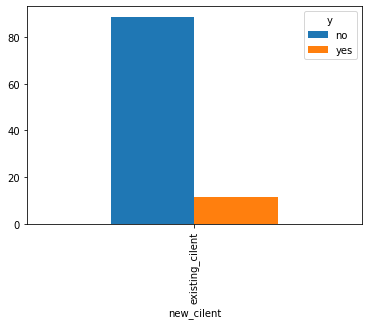

In [70]:
(pd.crosstab(pday['new_cilent'],pday["y"],normalize="index")*100).plot(kind="bar")

<AxesSubplot:xlabel='new_cilent', ylabel='count'>

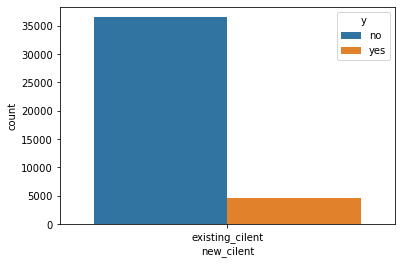

In [71]:
sns.countplot(pday["new_cilent"],hue=pday["y"])

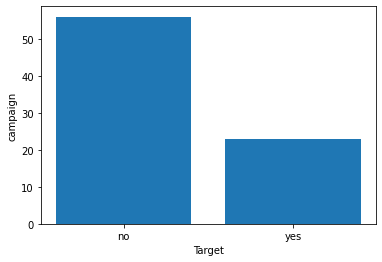

In [72]:
plt.bar(df["y"],df["campaign"])
plt.xlabel("Target")
plt.ylabel("campaign");

<AxesSubplot:xlabel='campaign', ylabel='y'>

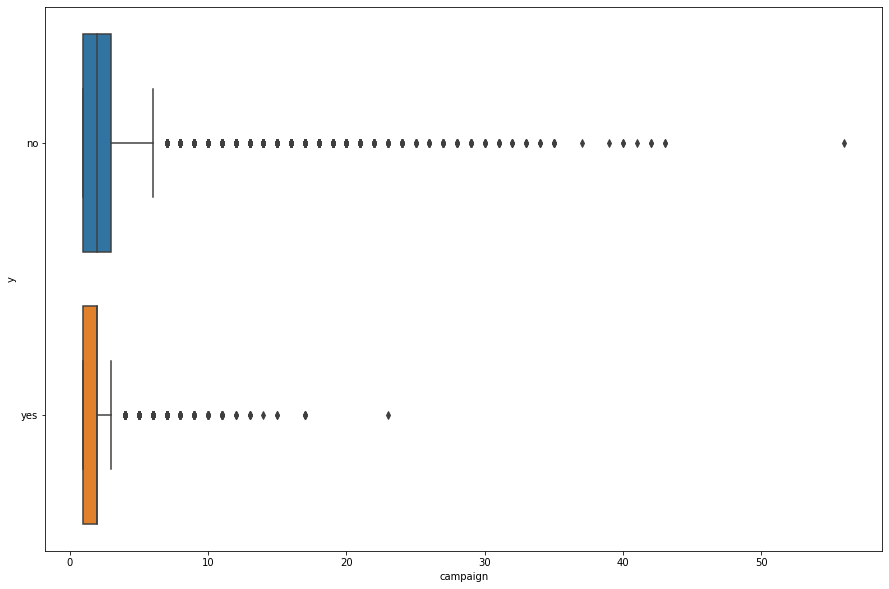

In [73]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x="campaign",y="y",width=0.8)

<AxesSubplot:xlabel='duration', ylabel='y'>

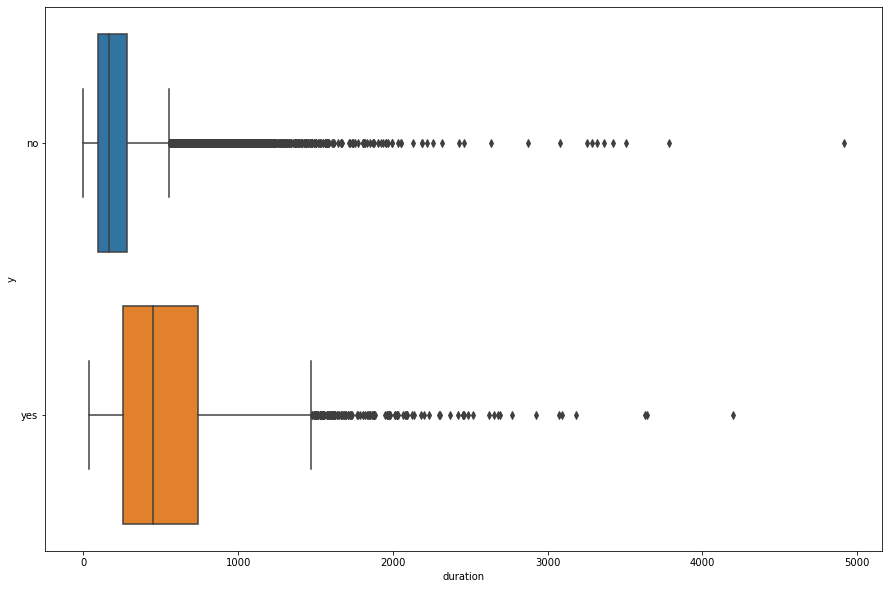

In [74]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x="duration",y="y",width=0.8)

In [75]:
# stats test

# ENCODING

In [78]:
df_cat = df.select_dtypes(include = 'object')
df_nu = df.select_dtypes(exclude = 'object')

In [79]:
from sklearn.preprocessing import LabelEncoder
LL = LabelEncoder()

df_cat['education'] = LL.fit_transform(df_cat['education'])
df_cat['default'] = LL.fit_transform(df_cat['default'])
df_cat['marital'] = LL.fit_transform(df_cat['marital'])
df_cat['housing'] = LL.fit_transform(df_cat['housing'])
df_cat['job'] = LL.fit_transform(df_cat['job'])
df_cat['loan'] = LL.fit_transform(df_cat['loan'])
df_cat['contact'] = LL.fit_transform(df_cat['contact'])
df_cat['month'] = LL.fit_transform(df_cat['month'])
df_cat['day_of_week'] = LL.fit_transform(df_cat['day_of_week'])
df_cat['poutcome'] = LL.fit_transform(df_cat['poutcome'])
df_cat['y'] = LL.fit_transform(df_cat['y'])

In [80]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0


In [81]:
df_nu.skew()

age               0.784697
duration          3.263141
campaign          4.762507
pdays             7.939537
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

In [82]:
from sklearn.feature_selection import chi2

res = chi2(df_cat.iloc[:, :-1], df_cat['y'])
features = pd.DataFrame({
    'features': df_cat.columns[:-1],
    'chi2': res[0],
    'p-value': res[1]
})

In [83]:
features

,features,chi2,p-value
0,job,90.175533,0.000000
1,marital,27.795598,0.000000
2,education,167.607283,0.000000
3,default,321.922903,0.000000
4,housing,4.978734,0.025661
5,loan,1.587004,0.207755
6,contact,547.958309,0.000000
7,month,1.927284,0.165056
8,day_of_week,10.231445,0.001381
9,poutcome,98.231174,0.000000


In [84]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson')

df_nu['duration'] = pt.fit_transform(df_nu[['duration']])
df_nu['campaign'] = pt.fit_transform(df_nu[['campaign']])

df_nu['nr.employed'] = pt.fit_transform(df_nu[['nr.employed']])

In [85]:
df_nu.skew()

age               0.784697
duration          0.016940
campaign          0.268430
pdays             7.939537
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -0.502649
dtype: float64

In [86]:
df_final = pd.concat([df_cat, df_nu], axis=1)

In [87]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             41188 non-null  int32  
 1   marital         41188 non-null  int32  
 2   education       41188 non-null  int32  
 3   default         41188 non-null  int32  
 4   housing         41188 non-null  int32  
 5   loan            41188 non-null  int32  
 6   contact         41188 non-null  int32  
 7   month           41188 non-null  int32  
 8   day_of_week     41188 non-null  int32  
 9   poutcome        41188 non-null  int32  
 10  y               41188 non-null  int32  
 11  age             41188 non-null  int64  
 12  duration        41188 non-null  float64
 13  campaign        41188 non-null  float64
 14  pdays           41188 non-null  int64  
 15  previous        41188 non-null  int64  
 16  emp.var.rate    41188 non-null  float64
 17  cons.price.idx  41188 non-null 

In [88]:
df_final.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,1,0,0,0,0,1,6,1,1,0,56,0.389913,-1.045497,0,0,1.100000,93.994000,-36.400000,4.857000,0.140827
1,7,1,3,1,0,0,1,6,1,1,0,57,-0.234770,-1.045497,0,0,1.100000,93.994000,-36.400000,4.857000,0.140827
2,7,1,3,0,2,0,1,6,1,1,0,37,0.225113,-1.045497,0,0,1.100000,93.994000,-36.400000,4.857000,0.140827
3,0,1,1,0,0,0,1,6,1,1,0,40,-0.220434,-1.045497,0,0,1.100000,93.994000,-36.400000,4.857000,0.140827
4,7,1,3,0,0,2,1,6,1,1,0,56,0.579397,-1.045497,0,0,1.100000,93.994000,-36.400000,4.857000,0.140827


In [89]:
X = df_final.drop('y', axis=1)
y = df_final['y']

SS = StandardScaler()

X = pd.DataFrame(SS.fit_transform(X), columns= X.columns, index= X.index)


In [90]:
Xc = sm.add_constant(X)

xtrain, xtest, ytrain, ytest = train_test_split(Xc, y, test_size=0.3,  random_state=5)


In [91]:
model = sm.Logit(ytrain, xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.201030
         Iterations 8


In [92]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28810
Method:                           MLE   Df Model:                           20
Date:                Fri, 09 Sep 2022   Pseudo R-squ.:                  0.4222
Time:                        00:59:54   Log-Likelihood:                -5795.9
converged:                       True   LL-Null:                       -10031.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.5514      0.044    -80.257      0.000      -3.638      -3.465
job                0.0451      0.024      1.852      0.064      -0.003       0.093
marital            0.0803      0.027

In [93]:
y_pred_prob = model.predict(xtest)

In [94]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

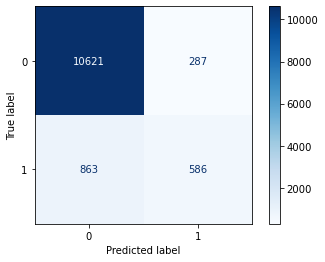

In [95]:
metrics.ConfusionMatrixDisplay.from_predictions(ytest, y_pred, cmap = 'Blues');

Text(0.02, 0.9, "('AUC Score:', 0.9314)")

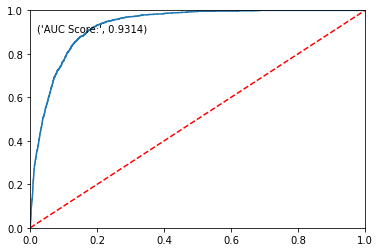

In [96]:
fpr, tpr, threshold = metrics.roc_curve(ytest, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred_prob),4)))

In [98]:
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10908
           1       0.67      0.40      0.50      1449

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [99]:
df_odds = pd.DataFrame(np.exp(model.params), columns= ['Odds Ratio']) 

# print the dataframe
df_odds.style.background_gradient(cmap = 'Blues')

,Odds Ratio
const,0.028685
job,1.046086
marital,1.083582
education,1.115814
default,0.847164
housing,1.019938
loan,1.005333
contact,0.670337
month,0.842232
day_of_week,1.071961
